In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# some necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow import keras
from keras.utils import pad_sequences
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.layers import SimpleRNN
from sklearn.metrics import classification_report

# set seed for reproducibility
np.random.seed(1234)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/korean-food-data/equal-pre-processed_kr3_50k.csv', header=0)
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (50000, 2)
   Rating                                             Review
0       0            뷰 는 너무 너무 좋다 가격 이 너무 사악하다 두 번은 가지 않다 하다
1       0       무슨 주차장 이 4 대다 주변 에 세우다 곳도 없다 옆 식당 은 주차장 도 넓다
2       1                       깔끔하다 먹다 하다 양도 괜찮다 가격 도 부담 없다
3       0                         삼계탕 은 괜찮다 일 하다 종업원 들 불친절하다
4       0  토마호크 스테이크 광고 에 혹 하다 크리스마스 기념 하다 가족 과 함께 저녁 먹다 ...


Text(0, 0.5, 'Count')

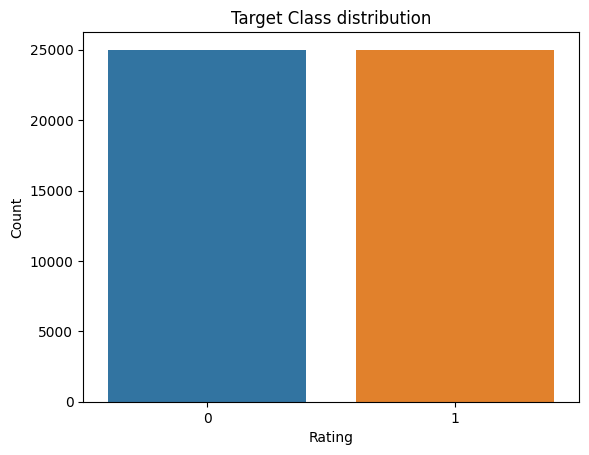

In [ ]:
# count the number of occurrences of each string in the DataFrame
counts = df['Rating'].value_counts()

# create a bar plot of the counts using seaborn
sns.barplot(x=counts.index, y=counts.values)

# add a title and labels to the plot
plt.title('Target Class distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (40006, 2)
test data size:  (9994, 2)


In [ ]:
test.columns

Index(['Rating', 'Review'], dtype='object')

In [ ]:
train = train.astype({"Review": object, "Review": str})

In [ ]:
# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Review)

x_train = tokenizer.texts_to_matrix(train.Review, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Review, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Rating)
y_train = encoder.transform(train.Rating)
y_test = encoder.transform(test.Rating)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (40006, 25000) (40006,)
test shapes: (9994, 25000) (9994,)
test first five labels: [0 1 0 0 1]


# Sequential Model

In [ ]:
# fit model
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
361/361 [==============================] - 5s 8ms/step - loss: 0.2993 - accuracy: 0.8899 - val_loss: 0.2341 - val_accuracy: 0.9163
Epoch 2/30
361/361 [==============================] - 2s 5ms/step - loss: 0.1322 - accuracy: 0.9556 - val_loss: 0.2425 - val_accuracy: 0.9215
Epoch 3/30
361/361 [==============================] - 2s 6ms/step - loss: 0.0847 - accuracy: 0.9723 - val_loss: 0.2643 - val_accuracy: 0.9198
Epoch 4/30
361/361 [==============================] - 2s 6ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.3080 - val_accuracy: 0.9165
Epoch 5/30
361/361 [==============================] - 2s 6ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.3502 - val_accuracy: 0.9115
Epoch 6/30
361/361 [==============================] - 2s 6ms/step - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.3833 - val_accuracy: 0.9110
Epoch 7/30
361/361 [==============================] - 2s 5ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.4266 - val_accuracy: 0.9095
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/korean-food-data/sequential_5k')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/korean-food-data/sequential_50k')

In [ ]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

100/100 [==============================] - 0s 4ms/step - loss: 0.9495 - accuracy: 0.9028
Accuracy:  0.9028416872024536


In [ ]:
print(score)


[0.9494510293006897, 0.9028416872024536]


In [ ]:
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_labels[:10]


[0, 1, 0, 0, 1, 1, 1, 0, 0, 0]

In [ ]:
y_test[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

accuracy score:  0.9028417050230139
precision score:  0.9166494312306102
recall score:  0.8864
f1 score:  0.9012709710218607


Note: it was 95% accurate without equalizing the data. 
It is less accurate after equalizing, but more likely to be actually picking out features instead of blindly guessing '1'

On the 10k dataset, it was only getting 85% accuracy. 

So I equalized the data for 50k, and now the model is around 90% accurate.

# RNN

NOTE: the notebook kept crashing on me for the large dataset I was using (50,000 rows)

I had to trim the dataset by a factor of 10 to prevent this. 

Eventually I also tried saving the sequential model, and only training the RNN. I was able to train the RNN on the 50k dataset, but it took 3 hours, and still had the same accuracy of 50%. 

In [ ]:
RX = df['Review']
Ry = df['Rating']

X_trainRNN, X_testRNN, y_trainRNN, y_testRNN = train_test_split(RX, Ry, test_size=0.2, random_state=42)

In [ ]:
RNN_max_words = 10000
RNN_max_length = 100

RNN_tokenizer = Tokenizer(num_words=RNN_max_words, oov_token='<OOV>')
RNN_tokenizer.fit_on_texts(X_trainRNN.astype(str))

RNN_X_train_seq = tokenizer.texts_to_sequences(X_trainRNN.astype(str))
RNN_X_test_seq = tokenizer.texts_to_sequences(X_testRNN)

In [ ]:
X_train_padded = pad_sequences(RNN_X_train_seq, maxlen=RNN_max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(RNN_X_test_seq, maxlen=RNN_max_length, padding='post', truncating='post')

In [ ]:

RNN_embedding_dim = 100

RNNmodel = Sequential([
    Embedding(RNN_max_words, RNN_embedding_dim, input_length=RNN_max_length),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

RNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 64)           10560     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,023,041
Trainable params: 1,023,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNNmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 32

RNNhistory = RNNmodel.fit(
    X_train_padded, y_trainRNN,
    validation_data=(X_test_padded, y_testRNN),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/10
1250/1250 - 144s - loss: 0.7022 - accuracy: 0.5153 - val_loss: 0.7096 - val_accuracy: 0.5288 - 144s/epoch - 115ms/step
Epoch 2/10
1250/1250 - 138s - loss: 0.6341 - accuracy: 0.6528 - val_loss: 0.6086 - val_accuracy: 0.6937 - 138s/epoch - 110ms/step
Epoch 3/10
1250/1250 - 139s - loss: 0.6017 - accuracy: 0.6792 - val_loss: 0.6700 - val_accuracy: 0.5812 - 139s/epoch - 111ms/step
Epoch 4/10
1250/1250 - 140s - loss: 0.6385 - accuracy: 0.6454 - val_loss: 0.6413 - val_accuracy: 0.6539 - 140s/epoch - 112ms/step
Epoch 5/10
1250/1250 - 141s - loss: 0.5856 - accuracy: 0.7121 - val_loss: 0.6147 - val_accuracy: 0.6858 - 141s/epoch - 113ms/step
Epoch 6/10
1250/1250 - 138s - loss: 0.5491 - accuracy: 0.7396 - val_loss: 0.6044 - val_accuracy: 0.6837 - 138s/epoch - 111ms/step
Epoch 7/10
1250/1250 - 138s - loss: 0.5304 - accuracy: 0.7513 - val_loss: 0.7672 - val_accuracy: 0.5822 - 138s/epoch - 110ms/step
Epoch 8/10
1250/1250 - 138s - loss: 0.5973 - accuracy: 0.6919 - val_loss: 0.6636 - val_acc

In [ ]:
RNNmodel.save('/content/drive/MyDrive/korean-food-data/rnn_final')

In [ ]:
RNNmodel = keras.models.load_model('/content/drive/MyDrive/korean-food-data/rnn_final')

In [ ]:
y_pred_rnn = (RNNmodel.predict(X_test_padded) > 0.5).astype("int32")

313/313 [==============================] - 9s 17ms/step


In [ ]:
print("RNN Model Evaluation:")
print(classification_report(y_testRNN, y_pred_rnn))

RNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.51      0.80      0.63      4965
           1       0.56      0.25      0.35      5035

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.49     10000
weighted avg       0.54      0.53      0.49     10000



# CNN

In [ ]:
CNNdf = pd.read_csv('/content/drive/MyDrive/korean-food-data/equal-pre-processed_kr3_50k.csv', header=0)

In [ ]:
CX = df['Review']
Cy = df['Rating']

X_trainCNN, X_testCNN, y_trainCNN, y_testCNN = train_test_split(CX, Cy, test_size=0.2, random_state=42)



In [ ]:
CNNmax_words = 10000
CNNmax_length = 100

CNNtokenizer = Tokenizer(num_words=CNNmax_words, oov_token='<OOV>')
CNNtokenizer.fit_on_texts(X_trainCNN.astype(str))

CNN_X_train_seq = CNNtokenizer.texts_to_sequences(X_trainCNN.astype(str))
CNN_X_test_seq = CNNtokenizer.texts_to_sequences(X_testCNN)

In [ ]:
CNN_X_train_padded = pad_sequences(CNN_X_train_seq, maxlen=CNNmax_length, padding='post', truncating='post')
CNN_X_test_padded = pad_sequences(CNN_X_test_seq, maxlen=CNNmax_length, padding='post', truncating='post')

In [ ]:
embedding_dim = 100

CNNmodel = Sequential([
    Embedding(CNNmax_words, embedding_dim, input_length=CNNmax_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,072,449
Trainable params: 1,072,449
Non-trainable params: 0
______________________________________________

In [ ]:
CNNmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 32

CNNhistory = CNNmodel.fit(
    CNN_X_train_padded, y_trainCNN,
    validation_data=(CNN_X_test_padded, y_testCNN),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/10
1250/1250 - 14s - loss: 0.2351 - accuracy: 0.9028 - val_loss: 0.1807 - val_accuracy: 0.9299 - 14s/epoch - 11ms/step
Epoch 2/10
1250/1250 - 3s - loss: 0.1078 - accuracy: 0.9605 - val_loss: 0.1929 - val_accuracy: 0.9273 - 3s/epoch - 3ms/step
Epoch 3/10
1250/1250 - 3s - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.2679 - val_accuracy: 0.9250 - 3s/epoch - 3ms/step
Epoch 4/10
1250/1250 - 3s - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.3150 - val_accuracy: 0.9249 - 3s/epoch - 3ms/step
Epoch 5/10
1250/1250 - 3s - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.3944 - val_accuracy: 0.9221 - 3s/epoch - 3ms/step
Epoch 6/10
1250/1250 - 3s - loss: 0.0135 - accuracy: 0.9950 - val_loss: 0.3860 - val_accuracy: 0.9262 - 3s/epoch - 3ms/step
Epoch 7/10
1250/1250 - 3s - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.3932 - val_accuracy: 0.9235 - 3s/epoch - 3ms/step
Epoch 8/10
1250/1250 - 3s - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.4489 - val_accuracy: 0.9199 - 3s/epoch - 3ms/step
Epoch

In [ ]:
CNNmodel.save('/content/drive/MyDrive/korean-food-data/cnn_final')

In [ ]:
CNNmodel = keras.models.load_model('/content/drive/MyDrive/korean-food-data/cnn_final')

In [ ]:
y_pred_cnn = (CNNmodel.predict(CNN_X_test_padded) > 0.5).astype("int32")
print("CNN Model Evaluation:")
print(classification_report(y_testCNN, y_pred_cnn))


313/313 [==============================] - 1s 2ms/step
CNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4965
           1       0.92      0.92      0.92      5035

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# different embedding approaches

In [ ]:
#1
embedding_dim_1 = 1000

CNNmodel_e1 = Sequential([
    Embedding(CNNmax_words, embedding_dim_1, input_length=CNNmax_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#2
embedding_dim_2 = 750

CNNmodel_e2 = Sequential([
    Embedding(CNNmax_words, embedding_dim_2, input_length=CNNmax_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#3

embedding_dim_3 = 10

CNNmodel_e3 = Sequential([
    Embedding(CNNmax_words, embedding_dim_3, input_length=CNNmax_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# train CNN models
CNNmodel_e1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 32

CNNhistory_e1 = CNNmodel_e1.fit(
    CNN_X_train_padded, y_trainCNN,
    validation_data=(CNN_X_test_padded, y_testCNN),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

CNNmodel_e2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 32

CNNhistory_e1 = CNNmodel_e2.fit(
    CNN_X_train_padded, y_trainCNN,
    validation_data=(CNN_X_test_padded, y_testCNN),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

CNNmodel_e3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 32

CNNhistory_e1 = CNNmodel_e3.fit(
    CNN_X_train_padded, y_trainCNN,
    validation_data=(CNN_X_test_padded, y_testCNN),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/10
1250/1250 - 8s - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.4936 - val_accuracy: 0.9245 - 8s/epoch - 6ms/step
Epoch 2/10
1250/1250 - 7s - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.4976 - val_accuracy: 0.9226 - 7s/epoch - 5ms/step
Epoch 3/10
1250/1250 - 7s - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.6858 - val_accuracy: 0.9178 - 7s/epoch - 6ms/step
Epoch 4/10
1250/1250 - 7s - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.5394 - val_accuracy: 0.9184 - 7s/epoch - 5ms/step
Epoch 5/10
1250/1250 - 7s - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.5811 - val_accuracy: 0.9200 - 7s/epoch - 6ms/step
Epoch 6/10
1250/1250 - 6s - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.7380 - val_accuracy: 0.9179 - 6s/epoch - 5ms/step
Epoch 7/10
1250/1250 - 7s - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.5944 - val_accuracy: 0.9124 - 7s/epoch - 5ms/step
Epoch 8/10
1250/1250 - 6s - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.5686 - val_accuracy: 0.9223 - 6s/epoch - 5ms/step
Epoch 9/

In [ ]:
CNNmodel_e1.save('/content/drive/MyDrive/korean-food-data/cnn_e1')
CNNmodel_e2.save('/content/drive/MyDrive/korean-food-data/cnn_e2')
CNNmodel_e3.save('/content/drive/MyDrive/korean-food-data/cnn_e3')

In [ ]:
CNNmodel_e1 = keras.models.load_model('/content/drive/MyDrive/korean-food-data/cnn_e1')
CNNmodel_e2 = keras.models.load_model('/content/drive/MyDrive/korean-food-data/cnn_e2')
CNNmodel_e3 = keras.models.load_model('/content/drive/MyDrive/korean-food-data/cnn_e3')

In [ ]:
y_pred_cnn_e1 = (CNNmodel_e1.predict(X_test_padded) > 0.5).astype("int32")
print("CNN Model Evaluation (Embedding 1):")
print(classification_report(y_testCNN, y_pred_cnn_e1))

y_pred_cnn_e2 = (CNNmodel_e2.predict(X_test_padded) > 0.5).astype("int32")
print("CNN Model Evaluation (Embedding 2):")
print(classification_report(y_testCNN, y_pred_cnn_e2))

y_pred_cnn_e3 = (CNNmodel_e3.predict(X_test_padded) > 0.5).astype("int32")
print("CNN Model Evaluation (Embedding 3):")
print(classification_report(y_testCNN, y_pred_cnn_e3))

313/313 [==============================] - 1s 2ms/step
CNN Model Evaluation (Embedding 1):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4965
           1       0.90      0.94      0.92      5035

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.91     10000

313/313 [==============================] - 1s 2ms/step
CNN Model Evaluation (Embedding 2):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4965
           1       0.93      0.93      0.93      5035

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

313/313 [==============================] - 1s 2ms/step
CNN Model Evaluation (Embedding 3):
              precision    recall  f1-score   support

           0      

# Testing the models on new data

In [ ]:
!pip install ko-ww-stopwords
!pip install kr-sentence
!python -m spacy download ko_core_news_md
!pip install konlpy

NotImplementedError: ignored

In [ ]:
from ko_ww_stopwords.stop_words import ko_ww_stop_words 
from ko_ww_stopwords.tools import is_stop_word, strip_outer_punct
import spacy
from konlpy.tag import Okt
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    # create a spacy nlp object
    nlp = spacy.load("ko_core_news_md")

    # create a WordNetLemmatizer object
    lemmatizer = WordNetLemmatizer()

    # create a list of stop words
    stop_words = set(ko_ww_stop_words)
    # remove non-alphanumeric characters and extra whitespaces
    # [^a-zA-Z\s] doesnt apply to korean
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove excess whitespace
    text = re.sub(r'\s+', ' ', text)
    # apply spacy nlp to tokenize and lemmatize the text
    doc = nlp(text)

    # tokenize korean sentence
    okt = Okt()
    tokens = okt.morphs(text, stem=True)

    # filter out stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
def prepare_text(text, tokenizer, max_length):

    text = preprocess_text(text)

    text_seq = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_seq, maxlen=max_length, padding='post', truncating='post')
    return text_padded

In [ ]:
              # the food here does not taste good, very salty, and very spicy
negative_text = "음식이 너무 맛 없고 너무 짜고 너무 매워요."
negative_padded = prepare_text(negative_text, tokenizer, max_length)

In [ ]:
# Sequential model
sequential_prediction = (model.predict(negative_padded) > 0.5).astype("int32")
print(f"Sequential Model Prediction: {sequential_prediction[0][0]}")

# RNN model
rnn_prediction = (RNNmodel.predict(negative_padded) > 0.5).astype("int32")
print(f"RNN Model Prediction: {rnn_prediction[0][0]}")

# CNN model
cnn_prediction = (CNNmodel.predict(negative_padded) > 0.5).astype("int32")
print(f"CNN Model Prediction: {cnn_prediction[0][0]}")

1/1 [==============================] - 0s 38ms/step
Sequential Model Prediction: 1
1/1 [==============================] - 0s 35ms/step
RNN Model Prediction: 0
1/1 [==============================] - 0s 20ms/step
CNN Model Prediction: 0


In [ ]:
                # this place’s hamburger and French fries are really good. My boyfriend and I come here often.
positive_text = "여기 햄버거 하고 감자튀김 되게 맛잇습니다. 여기는 저 남자 친구랑 자주 와요 💓"
positive_padded = prepare_text(positive_text, tokenizer, max_length)

In [ ]:
# Sequential model
sequential_prediction = (model.predict(positive_padded) > 0.5).astype("int32")
print(f"Sequential Model Prediction: {sequential_prediction[0][0]}")

# CNN model
cnn_prediction = (CNNmodel.predict(positive_padded) > 0.5).astype("int32")
print(f"CNN Model Prediction: {cnn_prediction[0][0]}")

# RNN model
rnn_prediction = (RNNmodel.predict(positive_padded) > 0.5).astype("int32")
print(f"RNN Model Prediction: {rnn_prediction[0][0]}")

1/1 [==============================] - 0s 37ms/step
Sequential Model Prediction: 1
1/1 [==============================] - 0s 21ms/step
CNN Model Prediction: 1
1/1 [==============================] - 0s 35ms/step
RNN Model Prediction: 0


# Analysis of the performance of various approaches 

## General Notes
This assignment was particularly fun and tricky due to the fact that the reviews were all in Korean. This meant that I had to pre-process for another language, which was really fun to do. I had to use specific libraries to help me with the preprocessing, notably: 

- konlpy (for tokenization): https://konlpy.org/en/latest/
- ko_ww_stopwords (for korean stop words): https://pypi.org/project/ko-ww-stopwords/
- ko_core_news_md in spacy (tokenize & lemmatize pipeline): https://spacy.io/models/ko

### issues with data
I also had to deal with the issue that the dataset was so large that I could not feasibly use all of it for the assignment. The original dataset had over 600,000 rows. applying the preprocessing to every row took so long I was not able to finish computation over night. To remedy this, I removed the ambiguious reviews, and then took the first 50,000 rows to use for training models. 

### skewed data
This went well until I realized that the data was so skewed, that the model could just guess 1 every time and achieve 90% accuracy. So I had to go back to the data pre-processing notebook, and create a dataset of 50,000 rows where 50% (25,000) rows were positive examples, and 50% were negative examples. I concatenated 2 dataframes (one with 25,000 positive examples and another with 25,000 negative examples) to create this dataset. In order to ensure that the clear divide of data didn't impact training, I shuffled all the rows. 

### training times and crashes.
The 50,000 dataset worked well with the Sequential model, but the RNN and CNN models would cause the colab runtime to crash, so I had to create smaller datasets for them, consisting of 5k and 10k rows. Each of these datasets are also 50% positive, 50% negative, and randomly shuffled. 


## Sequential
The sequential model, albiet the simplest, performed very well!
it was 95% accurate without equalizing the data. I thought this was likely due to the model always guessing positive, since the data was so skewed. 

I ended up equalizing the dataset so that there are 50% positive and 50% negative reviews. is less accurate after equalizing (around 90%), but more likely to be actually picking out features of the reviews instead of blindly guessing '1'.

I tested the sequential model with the 10k dataset, the 5k dataset, and the 50k dataset. On the 5k dataset, I was getting 80% accuracy. On the 10k dataset, it was only getting 85% accuracy. On the 50k dataset, the model is getting around 90% accuracy. 

All other metrics were around 90% as well. Very solid for a "simple" model.

The model trained in just over one minute. This was slower than the CNN, but way faster than the RNN. The metrics overall were slightly lower than CNN, but much greater than RNN. Even stand alone, metrics around 90% are good. 

## RNN
The RNN models trained very slow. They took several minutes to train even 10 epochs, and the accuracy and metrics were not very outstanding. 

The notebook kept crashing on me for the large dataset I was using containing 50,000 rows. I tried saving the models in the notebook and only training one model at a time. Doing this I was able to train the RNN on the 50,000 row dataset. This ended up taking 3 hours, and still had an accuracy of around 48-50%. 

 I ended up trimming the dataset by a factor of 10 so that I could reliably re-calculate the weights, and not crash the notebook. This RNN actually better metrics, with accuracy, f1, precision, and recall all around 50-60%. 

## CNN
The CNN ran very well. I ended up being able to use the 5k  Accuracy was always in the 90-95% range. All other metrics were also in the 90-95% range. The model was able to be trained in under a minute even on the 50k dataset, much much faster than the RNN network. It outperformed the RNN in every regard.

## Different embeddings
The different embeddings didn't seem to impact the output very much. All of the metrics were in the low 90%, for the embeddings that were 10, 750, and 1000

## New text: 
For fun, I asked my fiancee to generate a positive and negative review in Korean for a restaurant. The novel reviews were then pre-processed and fed into the models. The RNN and CNN predicted the negative review correctly, and the Sequential model and the CNN predicted the positive review correctly.  